In [1]:
import sys
sys.path.append('/Users/erikweilandt/Library/Caches/pypoetry/virtualenvs/tepem-FeojsIC2-py3.11/lib/python3.11/site-packages')

In [2]:
from sympy import symbols, simplify, prod, plot, diff, expand, integrate, solveset
from sympy.plotting.plot import plot3d
import numpy as np

In [3]:
def LagrangPoly(y,order,i,yi=None):
    if yi==None:
        yi=symbols('y:%d'%(order+1))
    index = list(range(order+1))
    index.pop(i)
    return prod([(y-yi[j])/(yi[i]-yi[j]) for j in index])

reference: https://www.longqi.cf/python/2014/03/24/implement-of-lagrange-polynomial-in-sympy/

In [4]:
test_order = 2
test_nodes = np.linspace(0,1, test_order+1)

In [5]:
x, y, s=symbols('x y s')
LagrangPoly(y,test_order,0)

(y - y1)*(y - y2)/((y0 - y1)*(y0 - y2))

## Define 1-D $\mathbb{P}_d$ shape functions in both directions

In [6]:
order_x = 2
order_y = 4

In [7]:
def get_chebby_points(start, end, num):
    ref_points = [-np.cos(np.pi * i / num) for i in range(num+1)]
    interval_points = [map_min1plus1_to_ab(x, start, end) for x in ref_points]
    return np.array(interval_points)

def map_min1plus1_to_ab(x,a, b):
    return (b-a)/2 * x + (a+b)/2

get_chebby_points(0,1,4)

array([0.        , 0.14644661, 0.5       , 0.85355339, 1.        ])

In [8]:
nodes_x = np.linspace(0,1, order_x+1)
nodes_y = np.linspace(0,1, order_y+1)

In [9]:
nodes_x = get_chebby_points(0,1, order_x)
nodes_y = get_chebby_points(0,1, order_y)

In [10]:
pols_x = {}
for i in range(order_x+1):
    pols_x[f"psi_{i}"] = simplify(LagrangPoly(x,order_x,i,list(nodes_x)))
pols_y = {}
for i in range(order_y+1):
    pols_y[f"xi_{i}"] = simplify(LagrangPoly(y,order_y,i,list(nodes_y)))
pols_x, pols_y

({'psi_0': 1.0*(x - 1)*(2.0*x - 1.0),
  'psi_1': 4.0*x*(1 - x),
  'psi_2': x*(2.0*x - 1.0)},
 {'xi_0': 1.0*(y - 1)*(1.17157287525381*y - 1.0)*(2.0*y - 1.0)*(6.82842712474619*y - 1.0),
  'xi_1': y*(-32.0*y**3 + 75.3137084989848*y**2 - 56.9705627484771*y + 13.6568542494924),
  'xi_2': 4.0*y*(y - 1)*(2.82842712474619*y - 2.41421356237309)*(2.82842712474619*y - 0.414213562373095),
  'xi_3': y*(-32.0*y**3 + 52.6862915010152*y**2 - 23.0294372515229*y + 2.34314575050762),
  'xi_4': y*(16.0*y**3 - 24.0*y**2 + 10.0*y - 0.999999999999999)})

In [11]:
#for pol in pols_x.values():
#    plot(pol, (x,0,1))

In [12]:
#for pol in pols_y.values():
#    plot(pol, (y,0,1))

# $\mathbb{Q}_{x,y}$ shape functions

Below we are numerating such that we follow the numbering as indicated in the notes. This means we first number all shape functions for x=0 and at last all shape functions with x=1.

In [13]:
q_sf = {}
name_counter = 0
for x_sf in pols_x.values():
    for y_sf in pols_y.values():
        q_sf[f"phi_{name_counter}"] = x_sf * y_sf
        name_counter += 1
q_sf

{'phi_0': 1.0*(x - 1)*(2.0*x - 1.0)*(y - 1)*(1.17157287525381*y - 1.0)*(2.0*y - 1.0)*(6.82842712474619*y - 1.0),
 'phi_1': 1.0*y*(x - 1)*(2.0*x - 1.0)*(-32.0*y**3 + 75.3137084989848*y**2 - 56.9705627484771*y + 13.6568542494924),
 'phi_2': 4.0*y*(x - 1)*(2.0*x - 1.0)*(y - 1)*(2.82842712474619*y - 2.41421356237309)*(2.82842712474619*y - 0.414213562373095),
 'phi_3': 1.0*y*(x - 1)*(2.0*x - 1.0)*(-32.0*y**3 + 52.6862915010152*y**2 - 23.0294372515229*y + 2.34314575050762),
 'phi_4': 1.0*y*(x - 1)*(2.0*x - 1.0)*(16.0*y**3 - 24.0*y**2 + 10.0*y - 0.999999999999999),
 'phi_5': 4.0*x*(1 - x)*(y - 1)*(1.17157287525381*y - 1.0)*(2.0*y - 1.0)*(6.82842712474619*y - 1.0),
 'phi_6': 4.0*x*y*(1 - x)*(-32.0*y**3 + 75.3137084989848*y**2 - 56.9705627484771*y + 13.6568542494924),
 'phi_7': 16.0*x*y*(1 - x)*(y - 1)*(2.82842712474619*y - 2.41421356237309)*(2.82842712474619*y - 0.414213562373095),
 'phi_8': 4.0*x*y*(1 - x)*(-32.0*y**3 + 52.6862915010152*y**2 - 23.0294372515229*y + 2.34314575050762),
 'phi_9':

In [14]:
q_sf_velo = {}
name_counter = 0
for i, x_sf in enumerate(pols_x.values()):
    for j, y_sf in enumerate(pols_y.values()):
        if j%order_y != 0:
            q_sf_velo[f"phi_{name_counter}"] = x_sf * y_sf
            name_counter += 1
q_sf_velo

{'phi_0': 1.0*y*(x - 1)*(2.0*x - 1.0)*(-32.0*y**3 + 75.3137084989848*y**2 - 56.9705627484771*y + 13.6568542494924),
 'phi_1': 4.0*y*(x - 1)*(2.0*x - 1.0)*(y - 1)*(2.82842712474619*y - 2.41421356237309)*(2.82842712474619*y - 0.414213562373095),
 'phi_2': 1.0*y*(x - 1)*(2.0*x - 1.0)*(-32.0*y**3 + 52.6862915010152*y**2 - 23.0294372515229*y + 2.34314575050762),
 'phi_3': 4.0*x*y*(1 - x)*(-32.0*y**3 + 75.3137084989848*y**2 - 56.9705627484771*y + 13.6568542494924),
 'phi_4': 16.0*x*y*(1 - x)*(y - 1)*(2.82842712474619*y - 2.41421356237309)*(2.82842712474619*y - 0.414213562373095),
 'phi_5': 4.0*x*y*(1 - x)*(-32.0*y**3 + 52.6862915010152*y**2 - 23.0294372515229*y + 2.34314575050762),
 'phi_6': x*y*(2.0*x - 1.0)*(-32.0*y**3 + 75.3137084989848*y**2 - 56.9705627484771*y + 13.6568542494924),
 'phi_7': 4.0*x*y*(2.0*x - 1.0)*(y - 1)*(2.82842712474619*y - 2.41421356237309)*(2.82842712474619*y - 0.414213562373095),
 'phi_8': x*y*(2.0*x - 1.0)*(-32.0*y**3 + 52.6862915010152*y**2 - 23.0294372515229*y + 

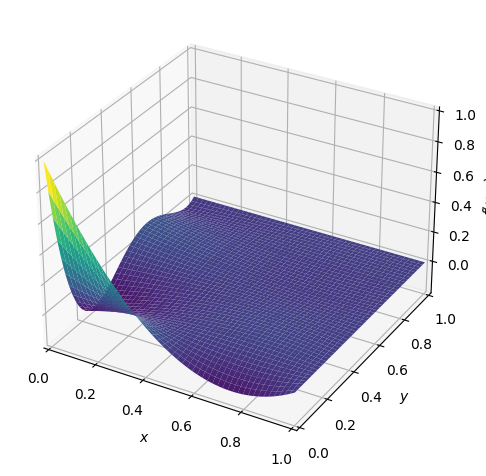

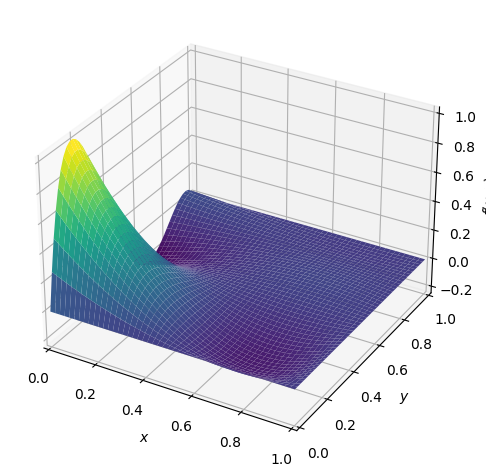

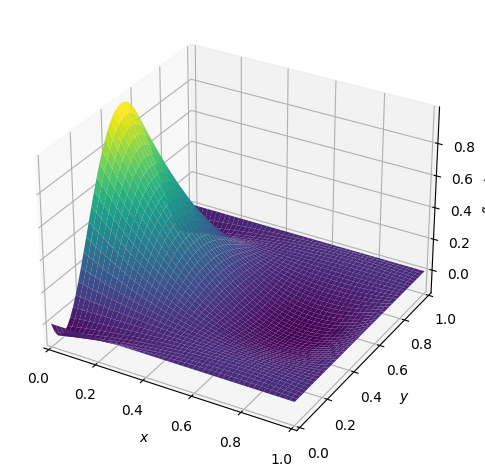

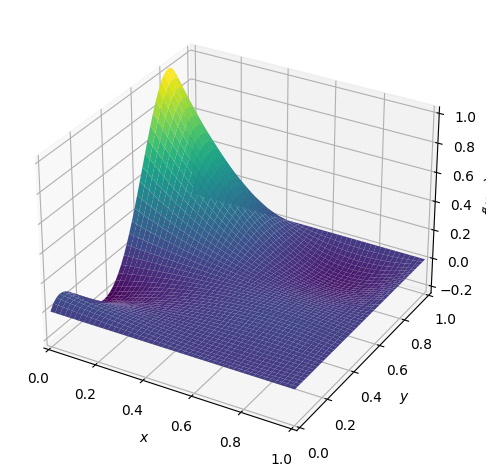

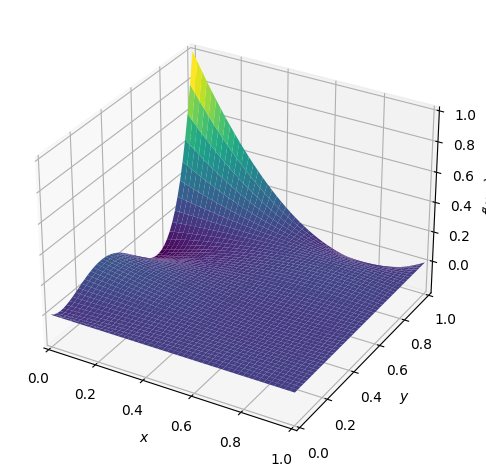

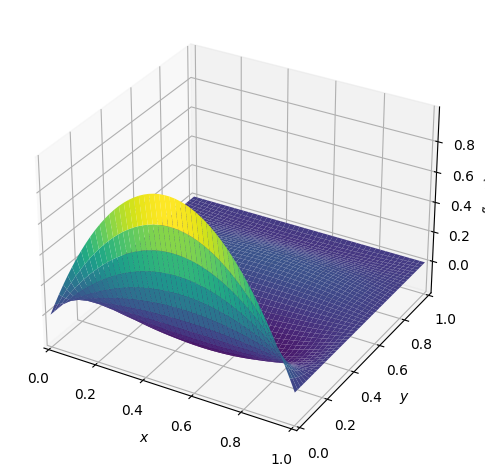

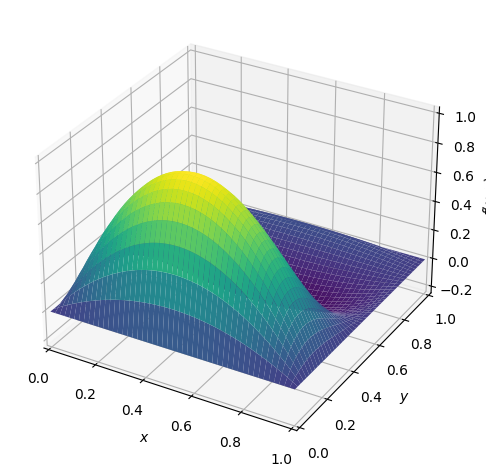

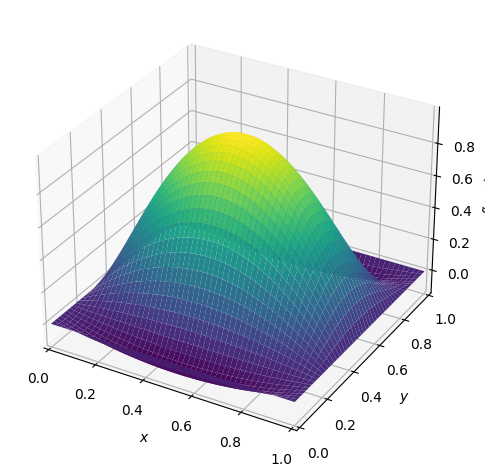

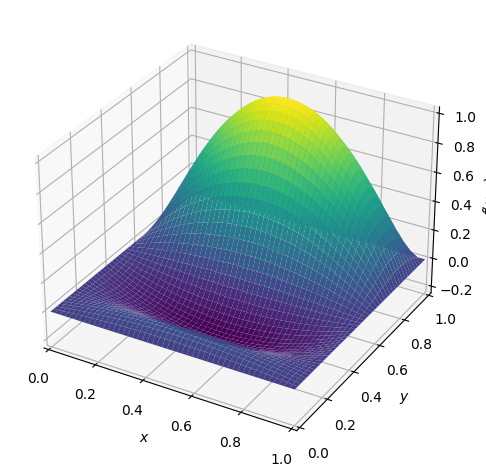

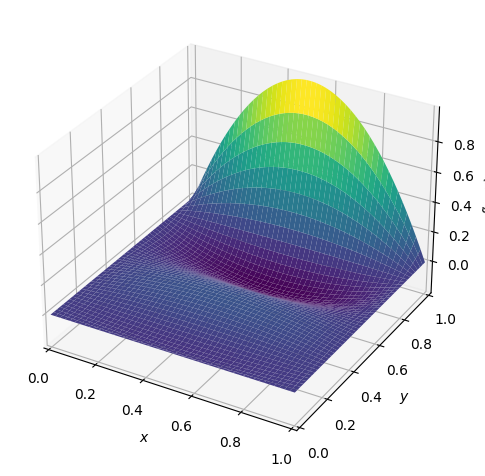

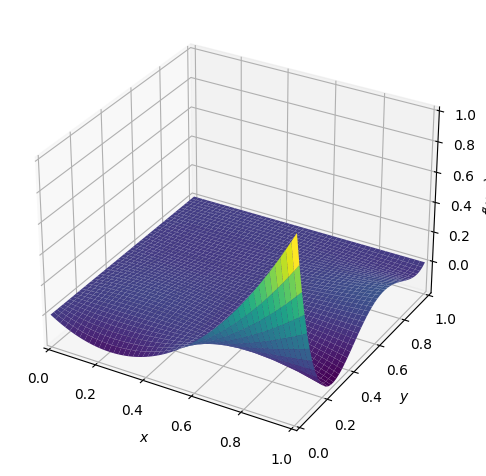

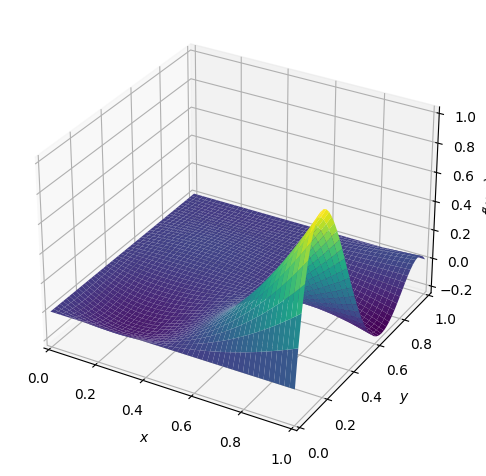

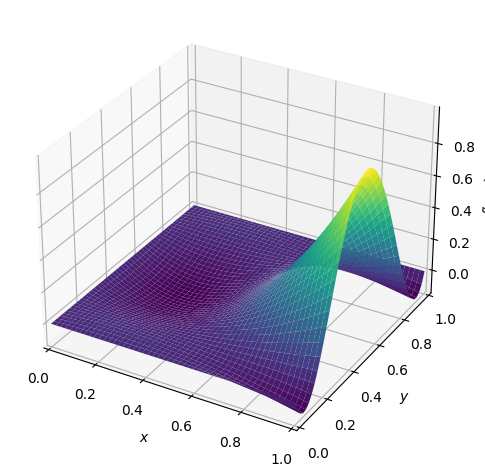

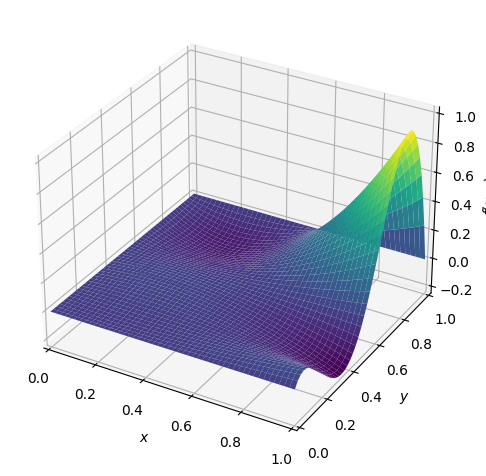

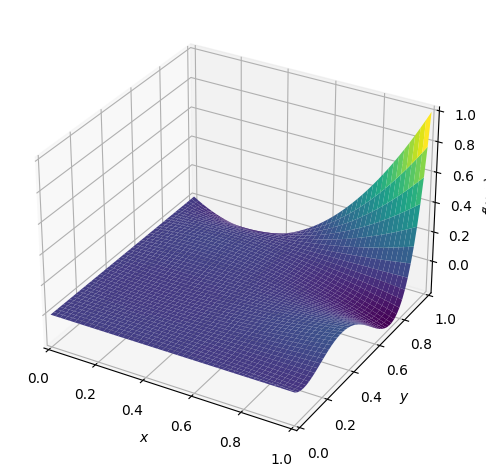

In [15]:
for pol in q_sf.values():
    plot3d(pol,(x,0,1), (y,0,1))

### Testing numeration

In [16]:
# check if the correct nodes are == 1
for i in range(order_y-1):
    assert q_sf_velo[f"phi_{i}"].subs([(x,0), (y,nodes_y[i+1])]) < 1+10e-10 and q_sf_velo[f"phi_{i}"].subs([(x,0), (y,nodes_y[i+1])]) > 1-10e-10, f"Node {i} is wrong"
    assert q_sf_velo[f"phi_{i+3}"].subs([(x,0.5), (y,nodes_y[i+1])]) < 1+10e-10 and q_sf_velo[f"phi_{i+3}"].subs([(x,0.5), (y,nodes_y[i+1])]) > 1-10e-10, f"Node {i+3} is wrong"
    assert q_sf_velo[f"phi_{i+6}"].subs([(x,1), (y,nodes_y[i+1])]) < 1+10e-10 and q_sf_velo[f"phi_{i+6}"].subs([(x,1), (y,nodes_y[i+1])]) > 1-10e-10, f"Node {i+6} is wrong"

__________________________________________________________________________________________________________________

In [17]:
grad_q = {}
for i, sf in enumerate(q_sf.values()):
    grad_x = diff(sf, x)
    grad_y = diff(sf, y)
    grad_q[f"grad_phi_{i}"] = (grad_x, grad_y)
#grad_q

In [18]:
grad_q_velo = {}
for i, sf in enumerate(q_sf_velo.values()):
    grad_x = diff(sf, x)
    grad_y = diff(sf, y)
    grad_q_velo[f"grad_phi_{i}"] = (grad_x, grad_y)
#grad_q_velo

## Printing in function form for script input

In [19]:
# Printing all shape functions
for sf_name, sf in q_sf.items():
    def_header = f"def {sf_name}(x: float, y: float) -> float:\n"
    body = f"\treturn {sf}"
    #print(def_header + body)

In [20]:
# Printing only velocity shape functions: leaving out the boundary shape functions
for sf_name, sf in q_sf_velo.items():
    def_header = f"def {sf_name}(x: float, y: float) -> float:\n"
    body = f"\treturn {sf}"
    print(def_header + body)

def phi_0(x: float, y: float) -> float:
	return 1.0*y*(x - 1)*(2.0*x - 1.0)*(-32.0*y**3 + 75.3137084989848*y**2 - 56.9705627484771*y + 13.6568542494924)
def phi_1(x: float, y: float) -> float:
	return 4.0*y*(x - 1)*(2.0*x - 1.0)*(y - 1)*(2.82842712474619*y - 2.41421356237309)*(2.82842712474619*y - 0.414213562373095)
def phi_2(x: float, y: float) -> float:
	return 1.0*y*(x - 1)*(2.0*x - 1.0)*(-32.0*y**3 + 52.6862915010152*y**2 - 23.0294372515229*y + 2.34314575050762)
def phi_3(x: float, y: float) -> float:
	return 4.0*x*y*(1 - x)*(-32.0*y**3 + 75.3137084989848*y**2 - 56.9705627484771*y + 13.6568542494924)
def phi_4(x: float, y: float) -> float:
	return 16.0*x*y*(1 - x)*(y - 1)*(2.82842712474619*y - 2.41421356237309)*(2.82842712474619*y - 0.414213562373095)
def phi_5(x: float, y: float) -> float:
	return 4.0*x*y*(1 - x)*(-32.0*y**3 + 52.6862915010152*y**2 - 23.0294372515229*y + 2.34314575050762)
def phi_6(x: float, y: float) -> float:
	return x*y*(2.0*x - 1.0)*(-32.0*y**3 + 75.3137084989

In [21]:
# Printing all gradient shape functions
for sf_name, sf in grad_q.items():
    def_header = f"def {sf_name}(x: float, y: float) -> npt.NDArray[np.float64]:\n"
    body = f"\tphi_dx = {sf[0]}\n\tphi_dy = {sf[1]}\n"
    return_str = f"\treturn np.array([phi_dx, phi_dy])"
    #print(def_header + body + return_str)

In [22]:
# Print velocity dof: leaving out the gradiants of shape function on the boundary
for sf_name, sf in grad_q_velo.items():
    def_header = f"def {sf_name}(x: float, y: float) -> npt.NDArray[np.float64]:\n"
    body = f"\tphi_dx = {sf[0]}\n\tphi_dy = {sf[1]}\n"
    return_str = f"\treturn np.array([phi_dx, phi_dy])"
    print(def_header + body + return_str)

def grad_phi_0(x: float, y: float) -> npt.NDArray[np.float64]:
	phi_dx = 2.0*y*(x - 1)*(-32.0*y**3 + 75.3137084989848*y**2 - 56.9705627484771*y + 13.6568542494924) + 1.0*y*(2.0*x - 1.0)*(-32.0*y**3 + 75.3137084989848*y**2 - 56.9705627484771*y + 13.6568542494924)
	phi_dy = 1.0*y*(x - 1)*(2.0*x - 1.0)*(-96.0*y**2 + 150.62741699797*y - 56.9705627484771) + 1.0*(x - 1)*(2.0*x - 1.0)*(-32.0*y**3 + 75.3137084989848*y**2 - 56.9705627484771*y + 13.6568542494924)
	return np.array([phi_dx, phi_dy])
def grad_phi_1(x: float, y: float) -> npt.NDArray[np.float64]:
	phi_dx = 8.0*y*(x - 1)*(y - 1)*(2.82842712474619*y - 2.41421356237309)*(2.82842712474619*y - 0.414213562373095) + 4.0*y*(2.0*x - 1.0)*(y - 1)*(2.82842712474619*y - 2.41421356237309)*(2.82842712474619*y - 0.414213562373095)
	phi_dy = 11.3137084989848*y*(x - 1)*(2.0*x - 1.0)*(y - 1)*(2.82842712474619*y - 2.41421356237309) + 11.3137084989848*y*(x - 1)*(2.0*x - 1.0)*(y - 1)*(2.82842712474619*y - 0.414213562373095) + 4.0*y*(x - 1)*(2.0*x - 1.0)

# Checking integral

In [23]:
p_sf = {'phi_0': -2.0*x*y**2 + 3.0*x*y - 1.0*x + 2.0*y**2 - 3.0*y + 1.0,
        'phi_1': 4.0*x*y**2 - 4.0*x*y - 4.0*y**2 + 4.0*y,
        'phi_2': -2.0*x*y**2 + 1.0*x*y + 2.0*y**2 - 1.0*y,
        'phi_3': 2.0*x*y**2 - 3.0*x*y + 1.0*x,
        'phi_4': -4.0*x*y**2 + 4.0*x*y,
        'phi_5': 2.0*x*y**2 - 1.0*x*y}
p_xy = p_sf["phi_0"] - s * p_sf["phi_1"] + p_sf["phi_2"] - p_sf["phi_3"] + s * p_sf["phi_4"] - p_sf["phi_5"]
expand(p_xy)

-8.0*s*x*y**2 + 8.0*s*x*y + 4.0*s*y**2 - 4.0*s*y - 8.0*x*y**2 + 8.0*x*y - 2.0*x + 4.0*y**2 - 4.0*y + 1.0

In [24]:
p_xy = p_xy.subs([(s, 0.5)])
p_xy

-12.0*x*y**2 + 12.0*x*y - 2.0*x + 6.0*y**2 - 6.0*y + 1.0

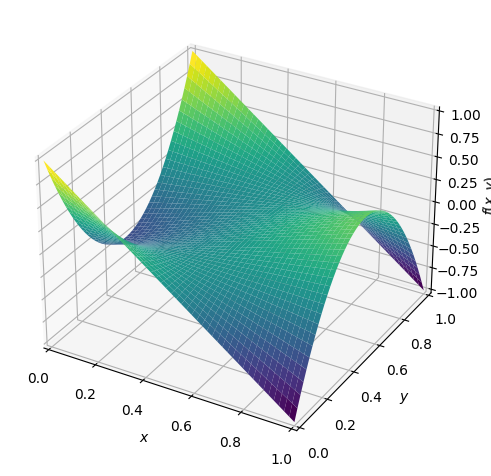

In [25]:
plot3d(p_xy, (x,0,1), (y,0,1))

__________________________________________________________________________________________________________________

## Testing for velocity shape function at boundary

In [26]:
# x-derivative:
for i in range(order_y-1):
    integrand_left = -p_xy * diff(q_sf_velo[f"phi_{i+(order_x*(order_y-1))}"], x)
    integrand_middle = p_xy * diff(q_sf_velo[f"phi_{i}"], x)
    integral_left = integrate(integrand_left, (x, 0,1), (y,0,1))
    integral_middle = integrate(integrand_middle, (x, 0,1), (y,0,1))
    print(f"Integrating with velocity Shape Function {i}:")
    print(f"\t {integral_left} + {integral_middle} = {integral_left + integral_middle}")

Integrating with velocity Shape Function 0:
	 0.0253968253968537 + -0.0253968253969674 = -1.13686837721616E-13
Integrating with velocity Shape Function 1:
	 -0.114285714285678 + 0.114285714285691 = 1.24344978758018E-14
Integrating with velocity Shape Function 2:
	 0.0253968253967916 + -0.0253968253967263 = 6.52811138479592E-14


In [27]:
# y-derivative:# x-derivative:
for i in range(order_y-1):
    integrand_left = -p_xy * diff(q_sf_velo[f"phi_{i+(order_x*(order_y-1))}"], x)
    integrand_middle = p_xy * diff(q_sf_velo[f"phi_{i}"], x)
    integral_left = integrate(integrand_left, (x, 0,1), (y,0,1))
    integral_middle = integrate(integrand_middle, (x, 0,1), (y,0,1))
    print(f"Integrating with velocity Shape Function {i}:")
    print(f"\t {integral_left} + {integral_middle} = {integral_left + integral_middle}")

Integrating with velocity Shape Function 0:
	 0.0253968253968537 + -0.0253968253969674 = -1.13686837721616E-13
Integrating with velocity Shape Function 1:
	 -0.114285714285678 + 0.114285714285691 = 1.24344978758018E-14
Integrating with velocity Shape Function 2:
	 0.0253968253967916 + -0.0253968253967263 = 6.52811138479592E-14


## Testing for velocity shape function in middle

In [28]:
# x-derivative:
for i in range(order_y-1):
    integrand = p_xy * diff(q_sf_velo[f"phi_{i+3}"], x)
    integral = integrate(integrand, (x, 0,1), (y,0,1))
    print(f"Integrating with velocity Shape Function {i+3}:")
    print(f"\t solution = {integral}")

Integrating with velocity Shape Function 3:
	 solution = 0.0507936507937856
Integrating with velocity Shape Function 4:
	 solution = -0.228571428571380
Integrating with velocity Shape Function 5:
	 solution = 0.0507936507935511


In [29]:
# y-derivative:
for i in range(order_y-1):
    integrand = p_xy * diff(q_sf_velo[f"phi_{i+3}"], y)
    integral = integrate(integrand, (x, 0,1), (y,0,1))
    print(f"Integrating with velocity Shape Function {i+3}:")
    print(f"\t solution = {integral}")

Integrating with velocity Shape Function 3:
	 solution = 2.12215430413683E-13
Integrating with velocity Shape Function 4:
	 solution = 6.17698484954114E-13
Integrating with velocity Shape Function 5:
	 solution = -2.36847578586700E-14


__________________________________________________________________________________________________________________

In [30]:
def integrate_b(velo_sf_l, velo_sf_r, pres_sol):
    v_sf_l_dx = diff(velo_sf_l, x)
    v_sf_l_dy = diff(velo_sf_l, y)
    v_sf_r_dx = diff(velo_sf_r, x)
    v_sf_r_dy = diff(velo_sf_r, y)
    
    
    integrant_dx_I = v_sf_l_dx * pres_sol
    integrant_dy_I = v_sf_l_dy * pres_sol
    integrant_dx_II = v_sf_r_dx * -pres_sol
    integrant_dy_II = v_sf_r_dy * -pres_sol
    
    int_sol_dx_I = integrate(integrate(integrant_dx_I, (y,0,1)),(x,0,1))
    int_sol_dy_I = integrate(integrate(integrant_dy_I, (y,0,1)),(x,0,1))
    int_sol_dx_II = integrate(integrate(integrant_dx_II, (y,0,1)),(x,0,1))
    int_sol_dy_II = integrate(integrate(integrant_dy_II, (y,0,1)),(x,0,1))
    print(f"Equation for s in x-direction (after integral):")
    print(int_sol_dx_I + int_sol_dx_II)
    print(f"Equation for s in y-direction (after integral):")
    print(int_sol_dy_I + int_sol_dy_II)
    s_val_x = solveset(int_sol_dx_I + int_sol_dx_II, s)
    s_val_y = solveset(int_sol_dy_I + int_sol_dy_II, s)
    return s_val_x, s_val_y

for i, v_sf in enumerate(q_sf_velo.values()):
    if i >=3:
        break
    print(f"Shape function {i} and {i+3}")
    print(integrate_b(q_sf_velo[f"phi_{i+3}"],v_sf, p_xy))

Shape function 0 and 3
Equation for s in x-direction (after integral):
0.0761904761903907
Equation for s in y-direction (after integral):
-0.188561808315447
(EmptySet, EmptySet)
Shape function 1 and 4
Equation for s in x-direction (after integral):
-0.342857142857113
Equation for s in y-direction (after integral):
1.99840144432528e-13
(EmptySet, EmptySet)
Shape function 2 and 5
Equation for s in x-direction (after integral):
0.0761904761902817
Equation for s in y-direction (after integral):
0.188561808316470
(EmptySet, EmptySet)


In [31]:
def validate_all(velo_l, velo_r, pres_sol):
    velo_l_